# Import Libraries and Dataset

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
card = pd.read_csv(r'C:\Users\2211551\Downloads\credit_card_defaulter.csv')
card.head(10)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625070
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138950
3,4,No,No,529.250605,35704.493940
4,5,No,No,785.655883,38463.495880
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513330,24905.226580
7,8,No,Yes,808.667504,17600.451340
8,9,No,No,1161.057854,37468.529290
9,10,No,No,0.000000,29275.268290


In [3]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [4]:
card.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000,NaN,NaN,NaN,5000.5,2886.9,1,2500.75,5000.5,7500.25,10000
default,10000,2,No,9667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
student,10000,2,No,7056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,10000,NaN,NaN,NaN,835.375,483.715,0,481.731,823.637,1166.31,2654.32
income,10000,NaN,NaN,NaN,33517,13336.6,771.968,21340.5,34552.6,43807.7,73554.2


In [5]:
card.shape

(10000, 5)

card data has 5 columns and 10000 observations. It does not have any null values

# Data visualisations

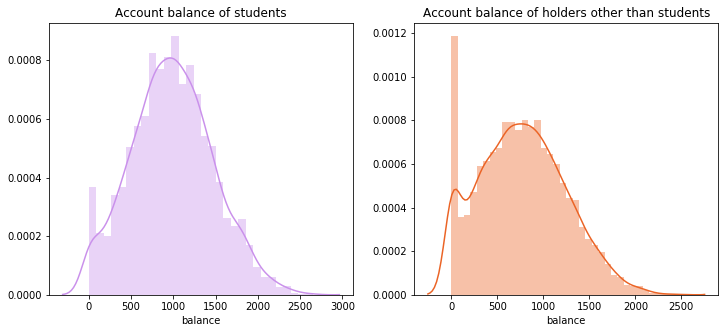

In [6]:
f= plt.figure(figsize=(12, 5))

ax= f.add_subplot(121)
sns.distplot(card[(card.student== 'Yes')]["balance"],color='#ca91eb')
ax.set_title('Account balance of students');

ax= f.add_subplot(122)
sns.distplot(card[(card.student== 'No')]["balance"],color='#eb6426')
ax.set_title('Account balance of holders other than students');

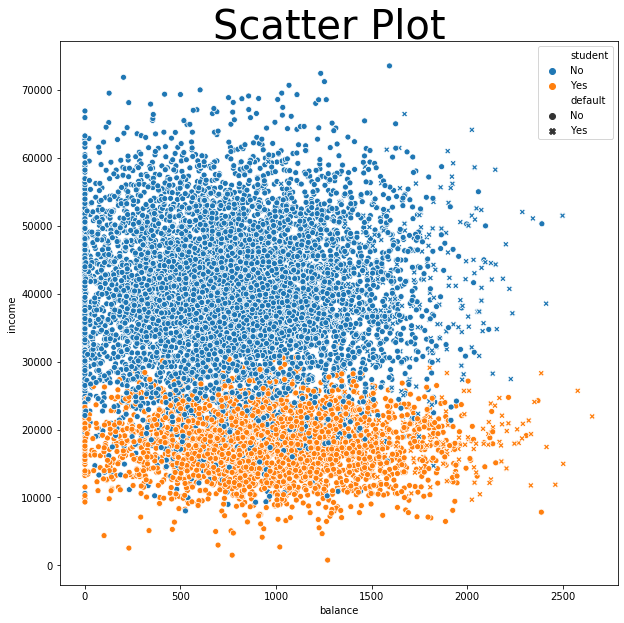

In [7]:
plt.figure(figsize=(10,10))
plt.gcf().text(.5, .9, "Scatter Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.scatterplot(x='balance',y='income',hue='student',style='default',data=card)
plt.show()

Almost all the students are having smaller income, but thier account balance is similar to others.
Defalulters are more towards higher balance.

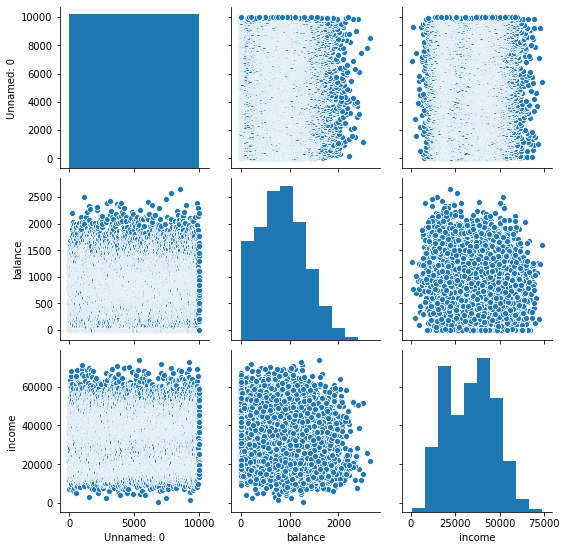

In [8]:
%matplotlib inline
sns.pairplot(card)

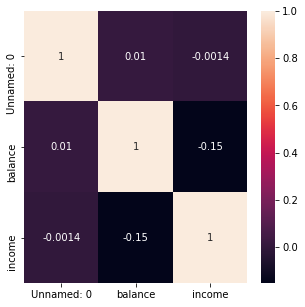

In [9]:
fig,axes = plt.subplots(figsize = (5,5))
sns.heatmap(card.corr(),annot=True)

In [10]:
card = card.drop('Unnamed: 0',axis=1)

In [11]:
card

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


# Encoding

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le= preprocessing.LabelEncoder()
card['student']= le.fit_transform(card.student.values)
card['default']= le.fit_transform(card.default.values)

In [14]:
x= card.drop("default",axis=1)
y= card["default"]
x

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588
...,...,...,...
9995,0,711.555020,52992.37891
9996,0,757.962918,19660.72177
9997,0,845.411989,58636.15698
9998,0,1569.009053,36669.11236


# Test Train splitting

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1)

# Scalling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [20]:
x_train_scaled.shape

(8000, 3)

In [21]:
x_test_scaled.shape

(2000, 3)

In [22]:
y_train.shape

(8000,)

In [23]:
y_test.shape

(2000,)

# Random forest classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state = 10, n_jobs = -1)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

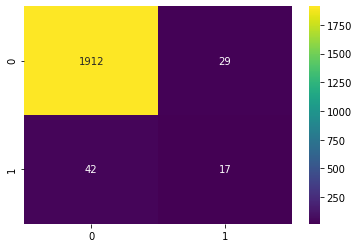

In [33]:
from sklearn.metrics import confusion_matrix
y_pred_rf = rf.predict(x_test_scaled)
rf.score(x_train_scaled, y_train)
colormap = plt.cm.viridis
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap (cm, annot=True, cmap=colormap, fmt='g')

precision : 0.37%
recall : 0.29%
f1-score: 0.32%
accuracy: 0.96%


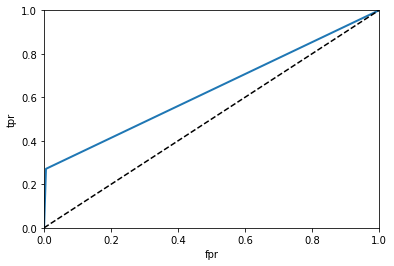

ROC-AUC-Score: 0.632759629406474


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_predict
score_rf = y_test, y_pred_rf
print("precision : {:.2F}%".format(precision_score(*score_rf)))
print("recall : {:.2F}%".format(recall_score(*score_rf)))
print("f1-score: {:.2F}%".format(f1_score(*score_rf)))
print("accuracy: {:.2F}%".format(accuracy_score(*score_rf)))
y_scores_rf = cross_val_predict(rf, x_test_scaled, y_test, cv=5)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show();
r_a_score = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC-Score:",r_a_score)


# Xgboost classifier

In [37]:
!pip install xgboost

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)
print(roc_auc_score(y_test, xgb.predict(x_test_scaled)))
print(accuracy_score(y_test, xgb.predict(x_test_scaled)))

0.6458447943136074
0.9665


Model evaluation

In [39]:
y_pred_xgb = xgb.predict(x_test_scaled)

precision : 0.41%
recall : 0.31%
f1-score: 0.35%


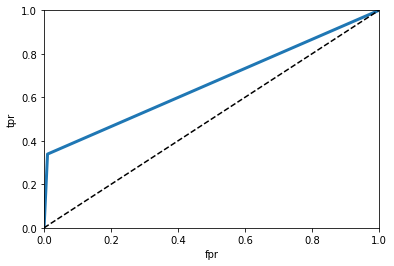

ROC-AUC-Score for XGB: 0.664339541910076


In [40]:
score_xgb = y_test, y_pred_xgb
print("precision : {:.2f}%".format(precision_score(*score_xgb)))
print("recall : {:.2F}%".format(recall_score(*score_xgb)))
print("f1-score: {:.2F}%".format(f1_score(*score_xgb)))
y_scores_xgb = cross_val_predict(xgb, x_test_scaled, y_test, cv=5)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_xgb)
def plot_roc_curve(fpr, tpr,label=None):
    plt.plot(fpr, tpr, linewidth=3, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show();
r_a_score_xgb = roc_auc_score(y_test, y_scores_xgb)
print("ROC-AUC-Score for XGB:",r_a_score_xgb)

Accuracy of both XGB and RF is similar, but the ROC-AUC score and f1 score is slightly better for XGB.
Thus, XGBoost is better than Random forest for <card> dataset.